In [1]:
%pip install gensim
from gensim.corpora import Dictionary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
import pandas as pd
from gensim.corpora import Dictionary

In [2]:
merged_df = pd.read_excel('/content/tokenized_newspaper_data.xlsx')
merged_df.head()

,date,publication_normalized,title_normalized,main_text_normalized,Title_tokenized,Main_text_tokenized
0,"Jul 11, 2002",The Washington Post,"sudden tragedy, long recovery; illness amputat...",after 14 years of coaching and 39 years of liv...,"['sudden', 'tragedy', 'long', 'recovery', 'ill...","['14', 'year', 'coaching', '39', 'year', 'livi..."
1,"Mar 15, 2002",Usa Today,down-home coach leads la. tech ; barmore s pro...,"see sidebar: 02c ruston, la. -- the dining roo...","['downhome', 'coach', 'lead', 'la', 'tech', 'b...","['see', 'sidebar', '02c', 'ruston', 'la', 'din..."
2,"Nov 17, 2002",Newsday,s latrell play well - next season: all editions,he gave the garden exactly what it missed all ...,"['latrell', 'play', 'well', 'next', 'season', ...","['gave', 'garden', 'exactly', 'missed', 'lonel..."
3,"Sep 2, 2002",Boston Globe,life no longer dream us worlds: third edition,indianapolis - ten years ago chuck daly was re...,"['life', 'longer', 'dream', 'u', 'world', 'thi...","['indianapolis', 'ten', 'year', 'ago', 'chuck'..."
4,"May 27, 2003",Newsday,sports flash: nassau suffolk edition,robinson to talk to rangers after the stanley ...,"['sport', 'flash', 'nassau', 'suffolk', 'editi...","['robinson', 'talk', 'ranger', 'stanley', 'cup..."


### **Normalized Titles Wordcloud**

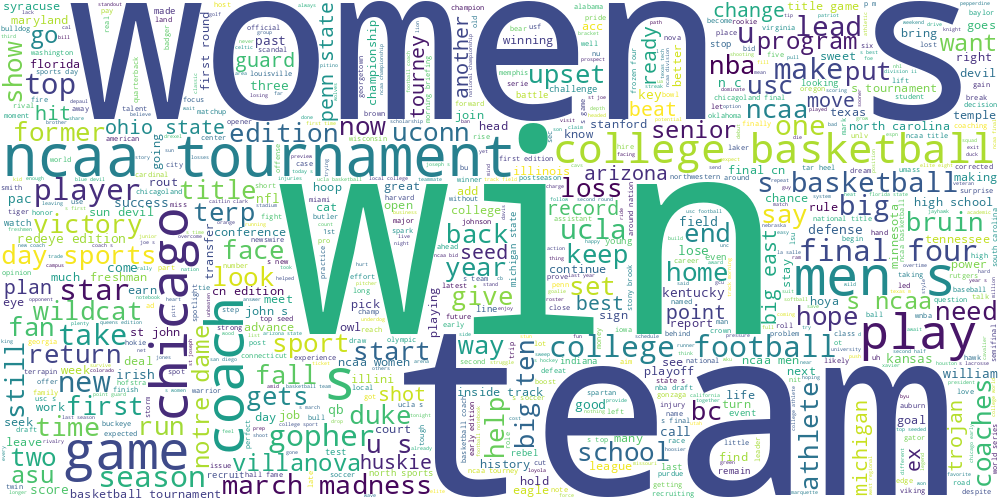

In [3]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
# Handle non-string values by converting them to empty strings
long_string = ','.join([str(item) if isinstance(item, str) else '' for item in list(merged_df['title_normalized'].values)])

# Define the list of words to remove
words_to_remove = [
    "final edition",
    "home edition",
    "suffolk edition",
    "valley edition",
    "nassau",
    "sulfolk",
    "sports desk",
    "metro edition",
    "edition newswire",
    "edition inside",
    "third edition"
]

# Remove the specified words from the long string
for word in words_to_remove:
    long_string = long_string.replace(word, "")

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500000, contour_width=3, contour_color='steelblue', width=1000, height=500)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [4]:
# Define the list of words to search for
words_to_search = [
    "final edition",
    "home edition",
    "suffolk edition",
    "valley edition",
    "nassau",
    "sulfolk",
    "sports desk",
    "metro edition",
    "edition newswire",
    "edition inside",
    "third edition"
]

# Create a boolean mask indicating whether each row contains any of the words
# We need to handle potential non-string values in the column
contains_words_mask = merged_df['Main_text_tokenized'].apply(lambda x: any(word in str(x).lower() for word in words_to_search))

# Filter the DataFrame based on the mask
rows_with_words = merged_df[contains_words_mask]

# Display the rows that contain the words
print(f"Found {len(rows_with_words)} rows containing the specified words.")
display(rows_with_words)

Found 600 rows containing the specified words.


,date,publication_normalized,title_normalized,main_text_normalized,Title_tokenized,Main_text_tokenized
216,"Mar 11, 2002",Newsday,2002 ncaa tournament preview march madness sou...,"south region thursday at bi-lo center, greenvi...","['2002', 'ncaa', 'tournament', 'preview', 'mar...","['south', 'region', 'thursday', 'bilo', 'cente..."
291,"Mar 6, 2002",Newsday,"look locals quinnipiac s grasso, banjo eyeing ...",jared grasso and rashaun banjo know most of th...,"['look', 'local', 'quinnipiac', 'grasso', 'ban...","['jared', 'grasso', 'rashaun', 'banjo', 'know'..."
607,"Mar 20, 2002",The Washington Post,"adding currie, duke perfects recipe; ex-bullis...",having recently started his second stint as th...,"['adelphi', 'name', 'watt', 'woman', 'hoop', '...","['kelley', 'watt', 'climbing', 'coaching', 'la..."
659,"Apr 5, 2002",The Washington Post,"all-out effort terps; three years ups downs, n...","since last october, when coach gary williams t...","['along', 'line', 'recruit', 'getting', 'ready...","['throughout', 'season', 'one', 'biggest', 'co..."
778,"Nov 27, 2002",Usa Today,atlanta mayor s tough job getting tougher ; ti...,nation atlanta -- mayor shirley franklin is di...,"['attitude', 'change', 'come', 'w', 'edition']","['claude', 'lapointe', 'islander', 'longest', ..."
...,...,...,...,...,...,...
148180,"Mar 16, 2025",Usa Today,men s march madness tickets prices first four:...,"as it has since 2011, the men s ncaa tournamen...","['newsday', 'long', 'island', 'alldecade', 'bo...","['gregg', 'sarra', 'mike', 'candel', 'greggsar..."
148181,"Mar 23, 2025",Usa Today,men s march madness upset predictions: teams s...,the opening days of the 2025 ncaa men s basket...,"['newsday', 'long', 'island', 'alldecade', 'bo...","['gregg', 'sarra', 'mike', 'candel', 'greggsar..."
148182,"Mar 21, 2025",Usa Today,men s march madness upset predictions: surpris...,editor s note: follow men s march madness live...,"['newsday', 'long', 'island', 'alldecade', 'gi...","['gregg', 'sarra', 'mike', 'candel', 'greggsar..."
149436,"Feb 21, 2025",Usa Today,trump s orders stamping mark: president tackle...,washington president donald trump has declared...,"['channel', 'lsu', 'v', 'nc', 'state', 'today'...","['editor', 'note', 'follow', 'lsu', 'v', 'nc',..."


In [5]:
# Define the list of words to remove
words_to_remove_main_text = [
    "final edition",
    "home edition",
    "suffolk edition",
    "valley edition",
    "nassau",
    "sulfolk",
    "sports desk",
    "metro edition",
    "edition newswire",
    "edition inside",
    "third edition"
]

# Function to remove words from a list of tokens
def remove_words_from_tokens(token_list, words_to_remove):
    if isinstance(token_list, list):
        return [token for token in token_list if token.lower() not in words_to_remove]
    return token_list # Return as is if not a list

# Apply the function to the 'Main_text_tokenized' column
merged_df['Main_text_tokenized'] = merged_df['Main_text_tokenized'].apply(lambda x: remove_words_from_tokens(x, words_to_remove_main_text))

print("Words removed from 'Main_text_tokenized'. Displaying the first 5 rows:")
display(merged_df.head())

Words removed from 'Main_text_tokenized'. Displaying the first 5 rows:


,date,publication_normalized,title_normalized,main_text_normalized,Title_tokenized,Main_text_tokenized
0,"Jul 11, 2002",The Washington Post,"sudden tragedy, long recovery; illness amputat...",after 14 years of coaching and 39 years of liv...,"['sudden', 'tragedy', 'long', 'recovery', 'ill...","['14', 'year', 'coaching', '39', 'year', 'livi..."
1,"Mar 15, 2002",Usa Today,down-home coach leads la. tech ; barmore s pro...,"see sidebar: 02c ruston, la. -- the dining roo...","['downhome', 'coach', 'lead', 'la', 'tech', 'b...","['see', 'sidebar', '02c', 'ruston', 'la', 'din..."
2,"Nov 17, 2002",Newsday,s latrell play well - next season: all editions,he gave the garden exactly what it missed all ...,"['latrell', 'play', 'well', 'next', 'season', ...","['gave', 'garden', 'exactly', 'missed', 'lonel..."
3,"Sep 2, 2002",Boston Globe,life no longer dream us worlds: third edition,indianapolis - ten years ago chuck daly was re...,"['life', 'longer', 'dream', 'u', 'world', 'thi...","['indianapolis', 'ten', 'year', 'ago', 'chuck'..."
4,"May 27, 2003",Newsday,sports flash: nassau suffolk edition,robinson to talk to rangers after the stanley ...,"['sport', 'flash', 'nassau', 'suffolk', 'editi...","['robinson', 'talk', 'ranger', 'stanley', 'cup..."


In [6]:
merged_df.head()

,date,publication_normalized,title_normalized,main_text_normalized,Title_tokenized,Main_text_tokenized
0,"Jul 11, 2002",The Washington Post,"sudden tragedy, long recovery; illness amputat...",after 14 years of coaching and 39 years of liv...,"['sudden', 'tragedy', 'long', 'recovery', 'ill...","['14', 'year', 'coaching', '39', 'year', 'livi..."
1,"Mar 15, 2002",Usa Today,down-home coach leads la. tech ; barmore s pro...,"see sidebar: 02c ruston, la. -- the dining roo...","['downhome', 'coach', 'lead', 'la', 'tech', 'b...","['see', 'sidebar', '02c', 'ruston', 'la', 'din..."
2,"Nov 17, 2002",Newsday,s latrell play well - next season: all editions,he gave the garden exactly what it missed all ...,"['latrell', 'play', 'well', 'next', 'season', ...","['gave', 'garden', 'exactly', 'missed', 'lonel..."
3,"Sep 2, 2002",Boston Globe,life no longer dream us worlds: third edition,indianapolis - ten years ago chuck daly was re...,"['life', 'longer', 'dream', 'u', 'world', 'thi...","['indianapolis', 'ten', 'year', 'ago', 'chuck'..."
4,"May 27, 2003",Newsday,sports flash: nassau suffolk edition,robinson to talk to rangers after the stanley ...,"['sport', 'flash', 'nassau', 'suffolk', 'editi...","['robinson', 'talk', 'ranger', 'stanley', 'cup..."


### **LDA Topic Modelling 10 Topics - 25 Passes**

In [7]:
import pandas as pd
from gensim.corpora import Dictionary
import ast

# Convert the string representation of lists back to actual lists, with error handling
texts = []
for item in merged_df['Main_text_tokenized']:
    if isinstance(item, str):
        try:
            texts.append(ast.literal_eval(item))
        except (SyntaxError, ValueError):
            texts.append([])  # Append empty list for malformed strings
    else:
        texts.append([]) # Append empty list for non-string values

dictionary = Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

In [10]:
import gensim
# Save the dictionary and corpus
dictionary.save('dictionary.gensim')
corpus_file = 'corpus.mm'
gensim.corpora.MmCorpus.serialize(corpus_file, corpus)

print(f"Dictionary saved to 'dictionary.gensim'")
print(f"Corpus saved to '{corpus_file}'")

Dictionary saved to 'dictionary.gensim'
Corpus saved to 'corpus.mm'


In [9]:
# #Create the Dictionary and Corpus needed for Topic Modeling
# doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

In [8]:
# Print the dictionary and corpus to verify
print("Dictionary:")
print(dictionary)
print("\nCorpus (first 5 documents):")
print(corpus[:5])

Dictionary:
Dictionary<416121 unique tokens: ['11', '14', '18', '20', '2001']...>

Corpus (first 5 documents):
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 7), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 3), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1

In [11]:
# import gensim
# # Creating the object for LDA model using gensim library
# LDA = gensim.models.ldamodel.LdaModel

# # Build LDA model
# lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
#                 chunksize=1000, passes=5,iterations=50)

In [12]:
# lda_model.print_topics()

In [14]:
import gensim
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model_10_topics = LDA(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=25,iterations=50)

/usr/local/lib/python3.12/dist-packages/gensim/models/ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)
/usr/local/lib/python3.12/dist-packages/gensim/models/ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [15]:
lda_model_10_topics.print_topics()

[(0,
  '0.025*"football" + 0.016*"game" + 0.015*"season" + 0.014*"state" + 0.011*"usc" + 0.011*"bowl" + 0.010*"quarterback" + 0.009*"college" + 0.009*"coach" + 0.009*"yard"'),
 (1,
  '0.027*"woman" + 0.019*"coach" + 0.017*"school" + 0.017*"year" + 0.015*"team" + 0.014*"basketball" + 0.012*"season" + 0.011*"player" + 0.011*"high" + 0.011*"college"'),
 (2,
  '0.022*"gopher" + 0.018*"game" + 0.017*"goal" + 0.016*"hockey" + 0.015*"minnesota" + 0.012*"season" + 0.012*"team" + 0.009*"first" + 0.007*"two" + 0.007*"four"'),
 (3,
  '0.010*"sport" + 0.008*"game" + 0.006*"one" + 0.006*"fan" + 0.006*"basketball" + 0.006*"time" + 0.005*"like" + 0.005*"people" + 0.005*"would" + 0.004*"day"'),
 (4,
  '0.014*"said" + 0.013*"college" + 0.012*"sport" + 0.012*"ncaa" + 0.011*"school" + 0.010*"athlete" + 0.009*"state" + 0.007*"would" + 0.007*"university" + 0.006*"football"'),
 (5,
  '0.009*"u" + 0.008*"first" + 0.008*"championship" + 0.008*"world" + 0.007*"team" + 0.007*"league" + 0.006*"olympic" + 0.006*"

In [16]:
# Save the LDA model
lda_model_10_topics.save("lda_model_2.gensim")

## **Visualization**

In [18]:
# libraries for visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [19]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_10_topics, corpus, dictionary)
vis

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.215329 -0.076902       1        1  22.221691
3     -0.213462  0.085008       2        1  12.306831
9      0.173737 -0.105839       3        1  11.066938
4     -0.237912  0.110193       4        1  10.892222
8      0.076701 -0.002706       5        1   9.760887
1     -0.051416 -0.038685       6        1   8.925751
5      0.014832 -0.010021       7        1   8.632748
0      0.080869 -0.023672       8        1   6.932896
7      0.277871  0.220824       9        1   4.908771
2      0.094109 -0.158200      10        1   4.351266, topic_info=            Term           Freq          Total Category  logprob  loglift
723        point  324937.000000  324937.000000  Default  30.0000  30.0000
347         said  600142.000000  600142.000000  Default  29.0000  29.0000
170         game  678546.000000  678546.000000  Default  28.0000  28.0000
160     football  172374.000000  172374.000000  Default  27.0000  27.0000
815   tournament  315312.000000  315312.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
456         year   16167.656692  430397.459083  Topic10  -5.2001  -0.1470
2495    michigan   12183.876297   89199.399915  Topic10  -5.4830   1.1439
422            u   12843.879372  213680.789319  Topic10  -5.4303   0.3231
808        third   11378.384711   67627.044574  Topic10  -5.5514   1.3524
58           big   11937.563651  181528.251655  Topic10  -5.5035   0.4130

[814 rows x 6 columns], token_table=        Topic      Freq        Term
term                               
1294        3  0.052737           0
1294        9  0.935510           0
1294       10  0.011799           0
843         1  0.000849           1
843         2  0.022395           1
...       ...       ...         ...
842         8  0.003753        york
842        10  0.045879        york
9989       10  0.999590  youngblood
173902      2  0.999631     youtube
47559       7  0.999394       zhang

[2260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 10, 5, 9, 2, 6, 1, 8, 3])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
#TFinding the dominant topic in each sentence

def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]).to_frame().T], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

     # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(20)

##### **© 2024–2025 MD Rafsun Sheikh**
##### **Licensed under the Apache License, Version 2.0.**